# Exercise 2. Seeded Clouds
![picture 1](images/af803a28f14d490dc75c64452db63c3d326991ca98535d20a1d631ee08ad1883.png)  


## 2A

![picture 2](images/4aa5133ac8e47114d4352f201f47d4d1b1944a0e539efbf6e6e16bd958f7f6e4.png)  


In [3]:
# Load in the clouds data
clouds_data <- read.table("clouds.txt", header = T)
head(clouds_data)

seeded,unseeded
129.6,26.10
31.4,26.30
2745.6,87.00
489.1,95.00
430.0,372.40
302.8,0.01


#### First let's see some data characteristics:

In [4]:
mean(clouds_data$seeded); mean(clouds_data$unseeded); shapiro.test(clouds_data$seeded); shapiro.test(clouds_data$unseeded)

[1] 441.9846

[1] 164.5619


	Shapiro-Wilk normality test

data:  clouds_data$seeded
W = 0.65626, p-value = 1.411e-06



	Shapiro-Wilk normality test

data:  clouds_data$unseeded
W = 0.60257, p-value = 3.166e-07


png 
  3

png 
  2

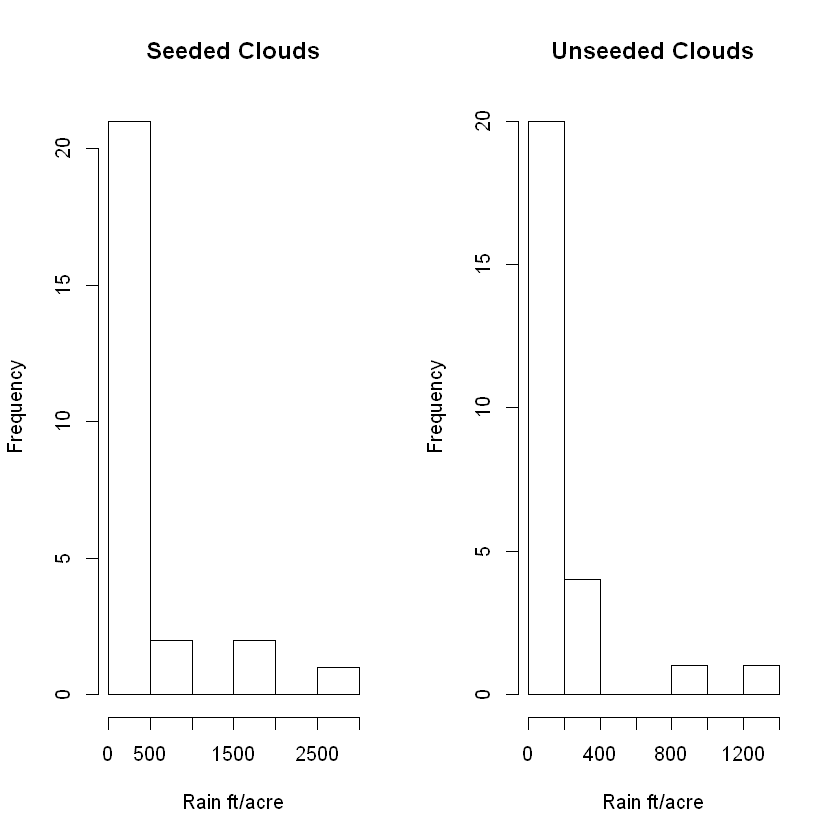

In [31]:
par(mfrow = c(1, 2))
hist(clouds_data$seeded, main='Seeded Clouds', xlab='Rain ft/acre'); hist(clouds_data$unseeded, main = "Unseeded Clouds",xlab='Rain ft/acre')
dev.copy(png,'plots/2a_hist.png', width=800, height=400)
dev.off()

png 
  3

png 
  2

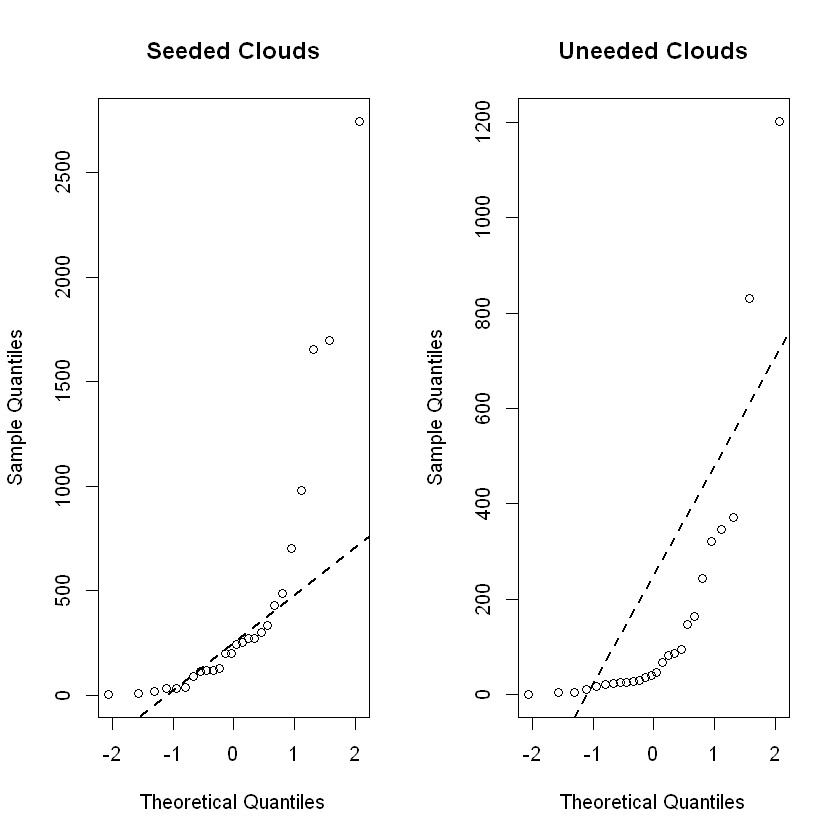

In [27]:
par(mfrow = c(1, 2))
qqnorm(clouds_data$seeded, main='Seeded Clouds'); qqline(clouds_data$seeded, col = 1,lwd=2,lty=2) 
qqnorm(clouds_data$unseeded, main='Uneeded Clouds'); qqline(clouds_data$seeded, col = 1,lwd=2,lty=2) 
dev.copy(png,'plots/2a_qqnorm.png', width=800, height=400)
dev.off()

#### Both data samples are not normally distributed

#### First test, two-sampled T test:

In [28]:
t.test(clouds_data$seeded, clouds_data$unseeded, paired = TRUE, alternative = "two.sided")


	Paired t-test

data:  clouds_data$seeded and clouds_data$unseeded
t = 2.1204, df = 25, p-value = 0.04407
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
   7.961957 546.883428
sample estimates:
mean of the differences 
               277.4227 


#### The Paired Sample T-test indicates that the two distributions differ significantly, now to test the question of whether being seeded with nitrate increases rainfall:

In [30]:
t.test(clouds_data$seeded, clouds_data$unseeded, paired = TRUE, alternative = "greater")


	Paired t-test

data:  clouds_data$seeded and clouds_data$unseeded
t = 2.1204, df = 25, p-value = 0.02204
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 53.93726      Inf
sample estimates:
mean of the differences 
               277.4227 


#### This seems to indicate that nitrate seeding does indicate higher rainfall, however, the data is not normally distributed and therefore this test is not applicable. 
#### Next, we use the mann-whitney u test: